# EYE FOR BLIND
This notebook will be used to prepare the capstone project 'Eye for Blind'

In [1]:
#Import all the required libraries

!pip install wordcloud
!pip install gTTs
!pip install playsound
!pip install glob2

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns 
from glob import glob
from skimage import io
pd.set_option('display.max_colwidth',-1) 

import collections
from wordcloud import WordCloud,STOPWORDS

import tensorflow as tf
import keras
from keras.preprocessing.image import load_img
import string
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import Input
from tqdm import tqdm
from PIL import Image

from gtts import gTTS
from playsound import playsound
from IPython import display

/var/folders/cp/6n8nvws95gg5nd0q3jg0gg5h0000gp/T/ipykernel_19462/1657750954.py:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


Let's read the dataset

## Data understanding
1.Import the dataset and read image & captions into two seperate variables

2.Visualise both the images & text present in the dataset

3.Create a dataframe which summarizes the image, path & captions as a dataframe

4.Create a list which contains all the captions & path

5.Visualise the top 30 occuring words in the captions



In [2]:
#Import the dataset and read the image into a separate variable

images='/Users/jyotimalik/Downloads/archive/Images'

all_imgs = glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 8091


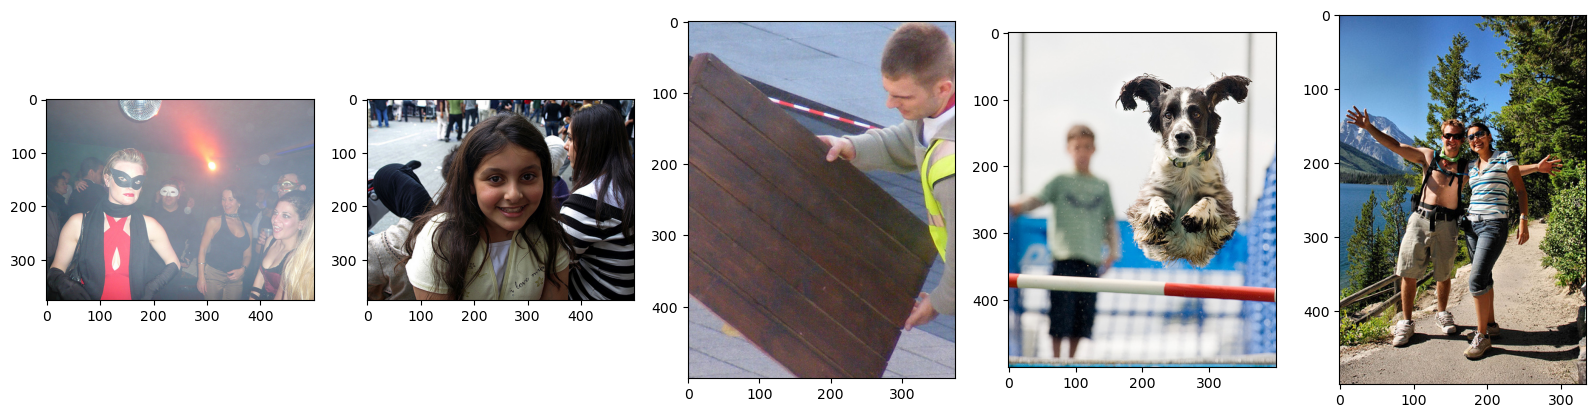

In [3]:
#Visualise both the images & text present in the dataset

Display_Images= all_imgs[0:5]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(20)
   
for ax,image in zip(axes, Display_Images):
    ax.imshow(io.imread(image), cmap=None)

In [4]:
#Import the dataset and read the text file into a separate variable

text_file = '/Users/jyotimalik/Downloads/archive/captions.txt'

def load_doc(text_file):
    
    #your code here
    open_file = open(text_file, 'r', encoding="latin-1") 
    text = open_file.read() 
    print(text)
    open_file.close()    
    return text

doc = load_doc(text_file)
print(doc[:300])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Create a dataframe which summarizes the image, path & captions as a dataframe

Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.

In [5]:
all_imgs

['/Users/jyotimalik/Downloads/archive/Images/2387197355_237f6f41ee.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/2609847254_0ec40c1cce.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/2046222127_a6f300e202.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/2853743795_e90ebc669d.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/2696951725_e0ae54f6da.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/3421131122_2e4bde661e.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/3229730008_63f8ca2de2.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/3220009216_10f088185e.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/3415578043_03d33e6efd.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/3437273677_47d4462974.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/3543600125_223747ef4c.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/2594459477_8ca0121a9a.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/2579899436_5086a33c7a.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/338763

In [6]:
image_path='/Users/jyotimalik/Downloads/archive/Images/'
all_img_id=[]  #store all the image id here
all_img_vector=[] #store all the image path here
annotations= []#store all the captions here

with open('/Users/jyotimalik/Downloads/archive/captions.txt', 'r') as fo:
    next(fo) # to skip the heading 
    for line in fo:
        split_arr=line.split(',')
        all_img_id.append(split_arr[0])
        annotations.append(split_arr[1].rstrip('\n.')) 
        all_img_vector.append(image_path+split_arr[0])
        
df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 
    
df

ID  \
0      1000268201_693b08cb0e.jpg   
1      1000268201_693b08cb0e.jpg   
2      1000268201_693b08cb0e.jpg   
3      1000268201_693b08cb0e.jpg   
4      1000268201_693b08cb0e.jpg   
...                          ...   
40450  997722733_0cb5439472.jpg    
40451  997722733_0cb5439472.jpg    
40452  997722733_0cb5439472.jpg    
40453  997722733_0cb5439472.jpg    
40454  997722733_0cb5439472.jpg    

                                                                       Path  \
0      /Users/jyotimalik/Downloads/archive/Images/1000268201_693b08cb0e.jpg   
1      /Users/jyotimalik/Downloads/archive/Images/1000268201_693b08cb0e.jpg   
2      /Users/jyotimalik/Downloads/archive/Images/1000268201_693b08cb0e.jpg   
3      /Users/jyotimalik/Downloads/archive/Images/1000268201_693b08cb0e.jpg   
4      /Users/jyotimalik/Downloads/archive/Images/1000268201_693b08cb0e.jpg   
...                                                                     ...   
40450  /Users/jyotimalik/Downloads/archive/Images/997722733_0cb5439472.jpg    
40451  /Users/jyotimalik/Downloads/archive/Images/997722733_0cb5439472.jpg    
40452  /Users/jyotimalik/Downloads/archive/Images/997722733_0cb5439472.jpg    
40453  /Users/jyotimalik/Downloads/archive/Images/997722733_0cb5439472.jpg    
40454  /Users/jyotimalik/Downloads/archive/Images/997722733_0cb5439472.jpg    

                                                                         Captions  
0      A child in a pink dress is climbing up a set of stairs in an entry way      
1      A girl going into a wooden building                                         
2      A little girl climbing into a wooden playhouse                              
3      A little girl climbing the stairs to her playhouse                          
4      A little girl in a pink dress going into a wooden cabin                     
...                                                         ...                    
40450  A man in a pink shirt climbs a rock face                                    
40451  A man is rock climbing high in the air                                      
40452  A person in a red shirt climbing up a rock face covered in assist handles   
40453  A rock climber in a red shirt                                               
40454  A rock climber practices on a rock climbing wall                            

[40455 rows x 3 columns]

In [7]:
type(annotations)

list

In [8]:
len(annotations)

40455

In [9]:
vocabulary= [word for line in annotations for word in line.split()]
vocabulary

['A',
 'child',
 'in',
 'a',
 'pink',
 'dress',
 'is',
 'climbing',
 'up',
 'a',
 'set',
 'of',
 'stairs',
 'in',
 'an',
 'entry',
 'way',
 'A',
 'girl',
 'going',
 'into',
 'a',
 'wooden',
 'building',
 'A',
 'little',
 'girl',
 'climbing',
 'into',
 'a',
 'wooden',
 'playhouse',
 'A',
 'little',
 'girl',
 'climbing',
 'the',
 'stairs',
 'to',
 'her',
 'playhouse',
 'A',
 'little',
 'girl',
 'in',
 'a',
 'pink',
 'dress',
 'going',
 'into',
 'a',
 'wooden',
 'cabin',
 'A',
 'black',
 'dog',
 'and',
 'a',
 'spotted',
 'dog',
 'are',
 'fighting',
 'A',
 'black',
 'dog',
 'and',
 'a',
 'tri-colored',
 'dog',
 'playing',
 'with',
 'each',
 'other',
 'on',
 'the',
 'road',
 'A',
 'black',
 'dog',
 'and',
 'a',
 'white',
 'dog',
 'with',
 'brown',
 'spots',
 'are',
 'staring',
 'at',
 'each',
 'other',
 'in',
 'the',
 'street',
 'Two',
 'dogs',
 'of',
 'different',
 'breeds',
 'looking',
 'at',
 'each',
 'other',
 'on',
 'the',
 'road',
 'Two',
 'dogs',
 'on',
 'pavement',
 'moving',
 'towa

In [10]:
#Create the vocabulary & the counter for the captions

vocabulary= [word.lower() for line in annotations for word in line.split()]

val_count=collections.Counter(vocabulary)
val_count

Counter({'a': 60196,
         'child': 1507,
         'in': 18174,
         'pink': 702,
         'dress': 332,
         'is': 9069,
         'climbing': 490,
         'up': 1215,
         'set': 105,
         'of': 6495,
         'stairs': 109,
         'an': 2325,
         'entry': 1,
         'way': 48,
         'girl': 3277,
         'going': 145,
         'into': 1046,
         'wooden': 278,
         'building': 485,
         'little': 1736,
         'playhouse': 6,
         'the': 17507,
         'to': 3005,
         'her': 1102,
         'cabin': 4,
         'black': 3620,
         'dog': 7948,
         'and': 8057,
         'spotted': 36,
         'are': 3365,
         'fighting': 130,
         'tri-colored': 12,
         'playing': 1954,
         'with': 7304,
         'each': 399,
         'other': 667,
         'on': 10357,
         'road': 380,
         'white': 3706,
         'brown': 2457,
         'spots': 28,
         'staring': 57,
         'at': 2810,
         'stree

a :  60196
in :  18174
the :  17507
on :  10357
is :  9069
and :  8057
dog :  7948
with :  7304
man :  7137
of :  6495
two :  5132
white :  3706
black :  3620
boy :  3514
are :  3365
woman :  3304
girl :  3277
to :  3005
wearing :  2916
people :  2811
at :  2810
water :  2676
young :  2587
red :  2553
brown :  2457
an :  2325
his :  2255
blue :  2125
dogs :  2095
running :  1996


Text(0, 0.5, 'Counts')

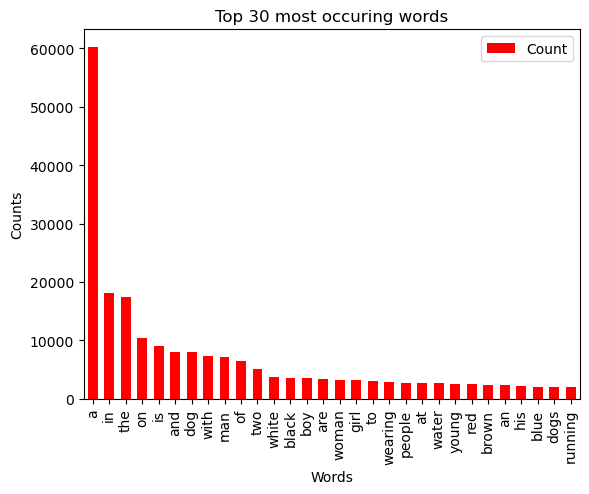

In [11]:
#Visualise the top 30 occuring words in the captions


for word, count in val_count.most_common(30):
    print(word, ": ", count)

lst = val_count.most_common(30)
most_common_words_df = pd.DataFrame(lst, columns = ['Word', 'Count'])
most_common_words_df.plot.bar(x='Word',y='Count',width=0.6,color='red')
plt.title("Top 30 most occuring words")
plt.xlabel("Words")
plt.ylabel("Counts")

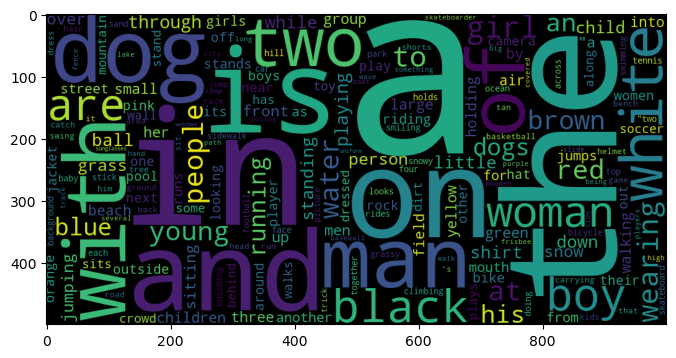

In [12]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(val_count)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)

dog :  7948
man :  7137
two :  5132
white :  3706
black :  3620
boy :  3514
woman :  3304
girl :  3277
wearing :  2916
people :  2811
water :  2676
young :  2587
red :  2553
brown :  2457
blue :  2125
dogs :  2095
running :  1996
playing :  1954
little :  1736
shirt :  1735
standing :  1702
ball :  1678
grass :  1565
person :  1515
child :  1507
snow :  1439
jumping :  1430
front :  1322
sitting :  1322
small :  1257


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'dog'),
  Text(1, 0, 'man'),
  Text(2, 0, 'two'),
  Text(3, 0, 'white'),
  Text(4, 0, 'black'),
  Text(5, 0, 'boy'),
  Text(6, 0, 'woman'),
  Text(7, 0, 'girl'),
  Text(8, 0, 'wearing'),
  Text(9, 0, 'people'),
  Text(10, 0, 'water'),
  Text(11, 0, 'young'),
  Text(12, 0, 'red'),
  Text(13, 0, 'brown'),
  Text(14, 0, 'blue'),
  Text(15, 0, 'dogs'),
  Text(16, 0, 'running'),
  Text(17, 0, 'playing'),
  Text(18, 0, 'little'),
  Text(19, 0, 'shirt'),
  Text(20, 0, 'standing'),
  Text(21, 0, 'ball'),
  Text(22, 0, 'grass'),
  Text(23, 0, 'person'),
  Text(24, 0, 'child'),
  Text(25, 0, 'snow'),
  Text(26, 0, 'jumping'),
  Text(27, 0, 'front'),
  Text(28, 0, 'sitting'),
  Text(29, 0, 'small')])

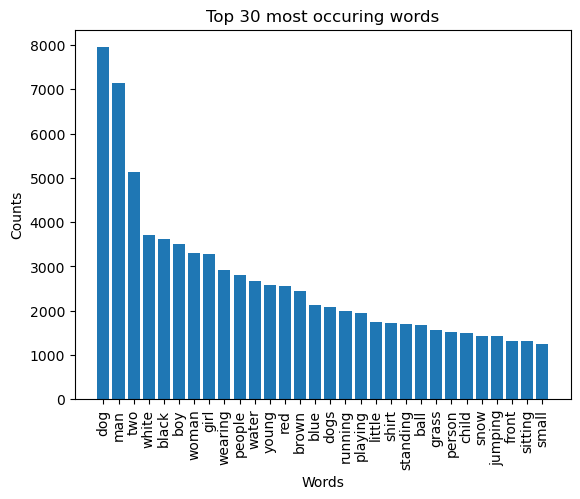

In [13]:
for word, count in val_count.most_common(47):
    if word not in STOPWORDS:
        print(word, ": ", count)

dict_without_stopwords = {}
for word, count in val_count.most_common(47):
    if word not in STOPWORDS:
        dict_without_stopwords[word] = count


#plt.bar(*zip(*dict_without_stopwords.items()))
#plt.show()
plt.bar(range(len(dict_without_stopwords)), dict_without_stopwords.values(), align='center')
plt.xticks(range(len(dict_without_stopwords)), list(dict_without_stopwords.keys()))
plt.title("Top 30 most occuring words")
plt.xlabel("Words")
plt.ylabel("Counts")
plt.xticks(rotation=90)

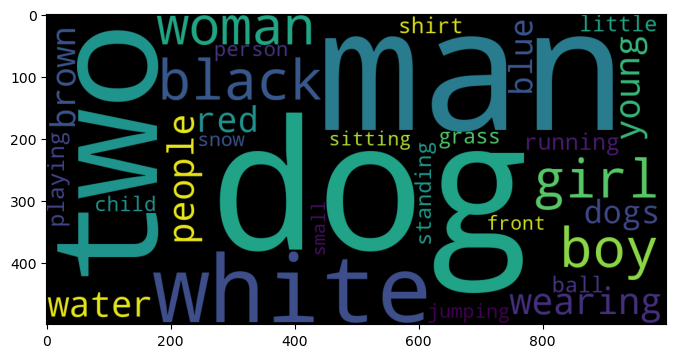

In [14]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(dict_without_stopwords)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)

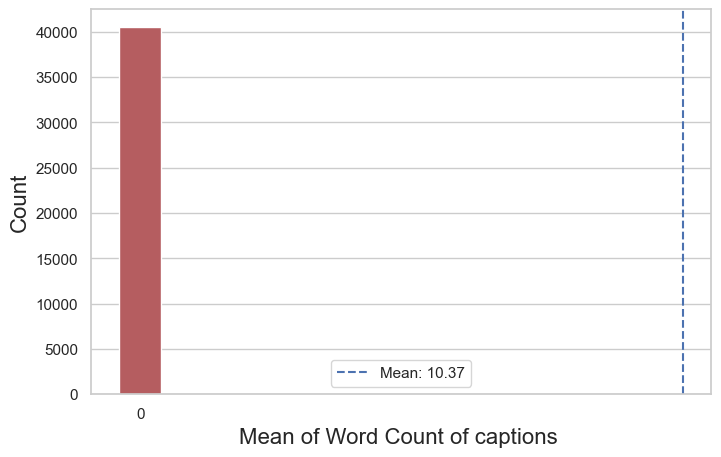

In [15]:
caption_df=df.copy()
caption_df['caption_word_count'] = caption_df["Captions"].str.split().str.len()

mean = sum(caption_df['caption_word_count'])/len(caption_df['caption_word_count'])

sns.set(style="whitegrid", font_scale = 1)
plt.figure(figsize=(8, 5))
ax = sns.countplot(caption_df['caption_word_count'], color="r")
plt.xlabel('Mean of Word Count of captions ', fontsize=16)
plt.ylabel('Count', fontsize=16)
ax.axvline(mean, color='b', linestyle='--')
plt.legend({'Mean: {:.2f}'.format(mean): mean})

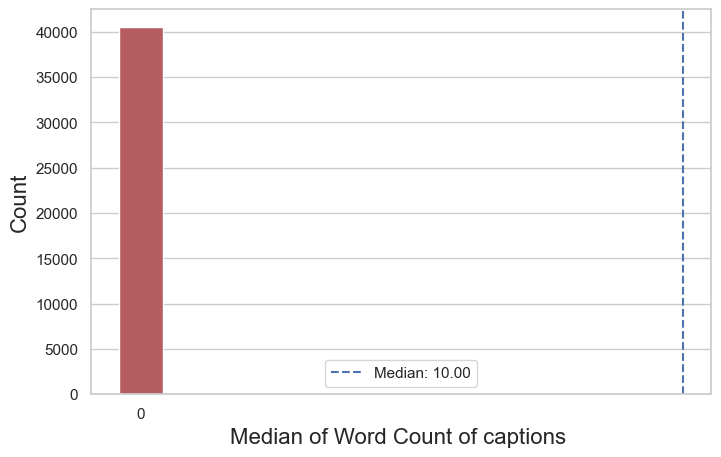

In [16]:
mean = np.median(caption_df['caption_word_count'])

sns.set(style="whitegrid", font_scale = 1)
plt.figure(figsize=(8, 5))
ax = sns.countplot(caption_df['caption_word_count'], color="r")
plt.xlabel('Median of Word Count of captions ', fontsize=16)
plt.ylabel('Count', fontsize=16)
ax.axvline(mean, color='b', linestyle='--')
plt.legend({'Median: {:.2f}'.format(mean): mean})

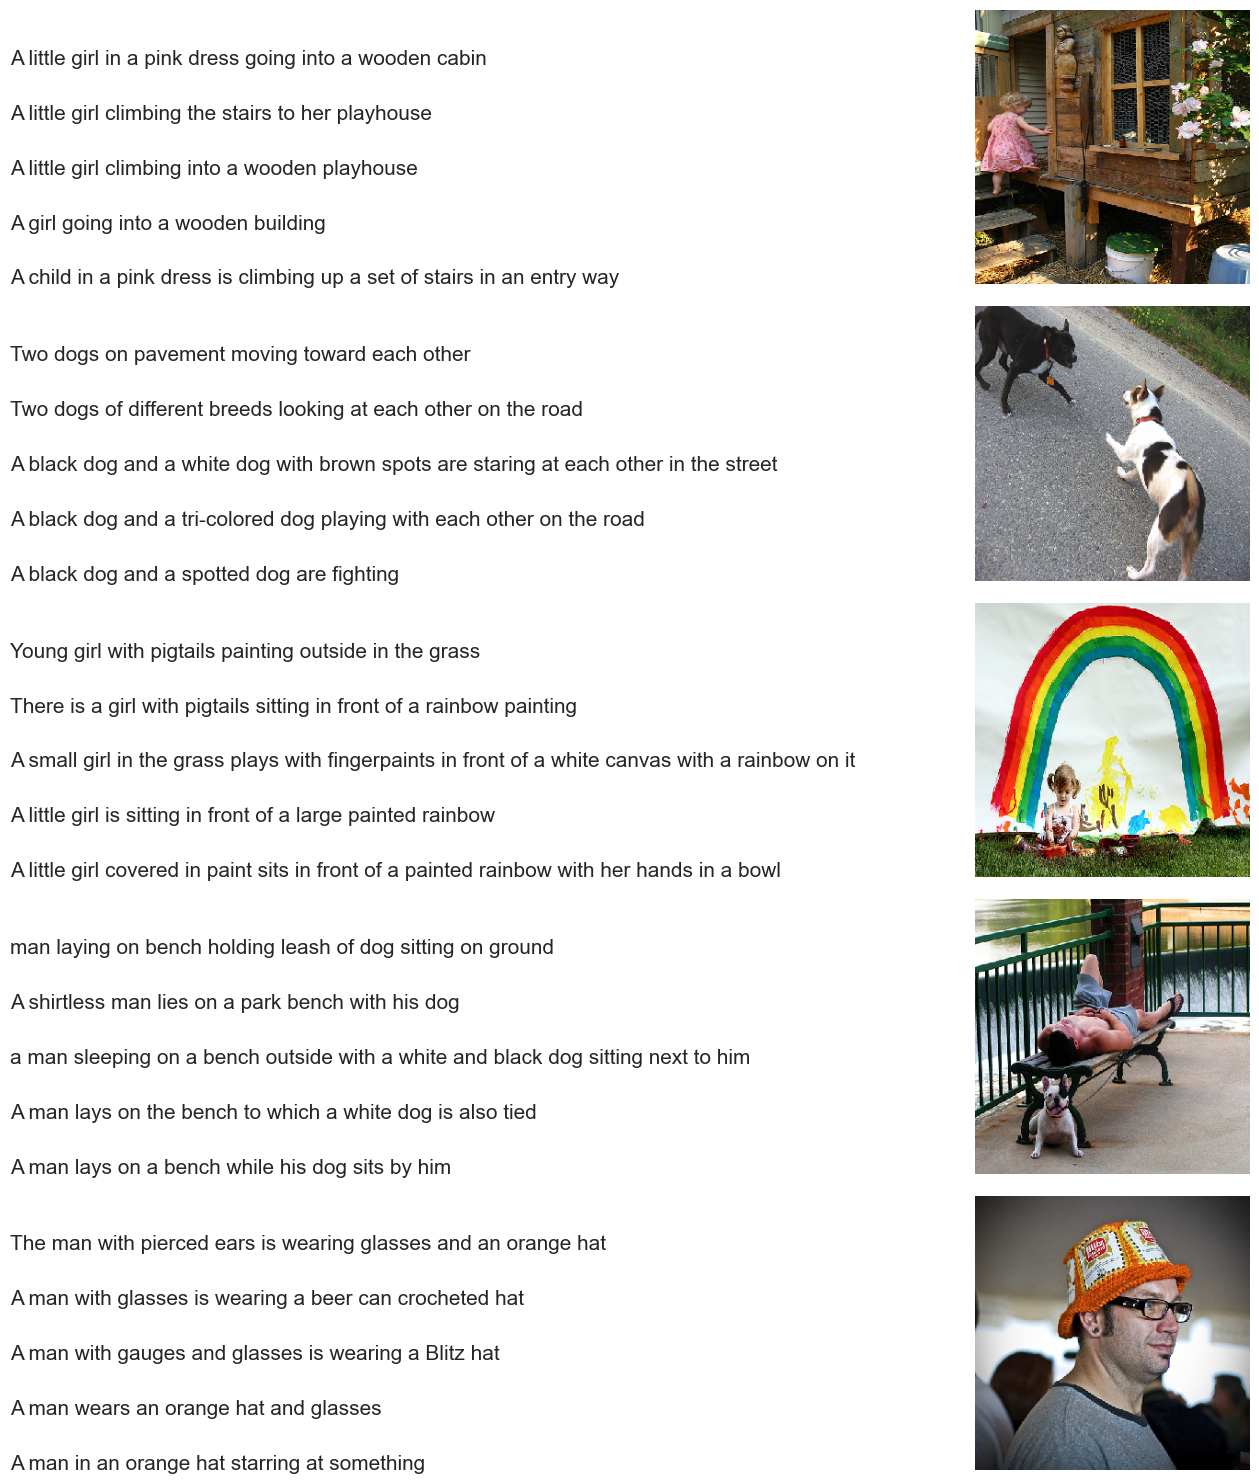

In [17]:
fig = plt.figure(figsize=(15,15)) # For dosplaying image
count = 1
    
for Path in df[:25].Path.unique(): # Loading 1st 25 paths which will have 5 distinct images
    captions = list(df["Captions"].loc[df.Path== Path].values)
    display_image = load_img(Path,target_size=(299,299,3))
    ax = fig.add_subplot(5,2,count) #Adding a subplot that spans 5 rows:
    plt.axis('off')  # we don't want both x and y axes for caption 
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,len(captions)) #to decide the spacing between each line of caption
    for i, caption in enumerate(captions):
        ax.text(0,i,caption,fontsize=15)  #to display the captions         
    count+=1
    plt.tight_layout() #to make sure that image and caption don't overlap

    ax = fig.add_subplot(5,2,count)
    ax.imshow(display_image)
    plt.axis('off')
    count +=1

plt.show()

In [18]:
#Data cleaning

#Prepare translation table for removing punctuation

remove_punctuation = str.maketrans('', '', string.punctuation)
for i in range(len(annotations)):
    line = annotations[i]
    line = line.split()
    line = [word.lower() for word in line] # convert to lower case
    line = [word.translate(remove_punctuation) for word in line]# remove punctuation from each token
    line = [word for word in line if len(word)>1] # remove hanging 's' and 'a'
    line = [word for word in line if word.isalpha()]# remove tokens with numbers in them
    annotations[i]=  ' '.join(line)   # store as string

In [19]:
#Create a list which contains all the captions

#add the <start> & <end> token to all those captions as well
annotations=['<start>' + ' ' +  line + ' ' + '<end>' for line in annotations]

#Create a list which contains all the path to the images
all_img_path= all_img_vector

print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_path)))

Total captions present in the dataset: 40455
Total images present in the dataset: 40455


In [20]:
annotations[0:5]

['<start> child in pink dress is climbing up set of stairs in an entry way <end>',
 '<start> girl going into wooden building <end>',
 '<start> little girl climbing into wooden playhouse <end>',
 '<start> little girl climbing the stairs to her playhouse <end>',
 '<start> little girl in pink dress going into wooden cabin <end>']

## Pre-Processing the captions
1.Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters. 
This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

2.Replace all other words with the unknown token "UNK" .

3.Create word-to-index and index-to-word mappings.

4.Pad all sequences to be the same length as the longest one.

In [21]:
top_voc = 5000
tokenizer =Tokenizer(num_words=top_voc+1,filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ',
                                                  lower=True, char_level=False,
                                                  oov_token="UNK")


# Create word-to-index and index-to-word mappings.

tokenizer.fit_on_texts(annotations) #Updates internal vocabulary based on a list of texts.

train_seqs = tokenizer.texts_to_sequences(annotations)#Transforms each text in texts to a sequence of integers.

# when we use the pad_sequence to process the sequence, we will be using 0 as the padding value.
# In order to distinguish between PAD and UNKNOWN, keras use different index for UNKNOWN.

# 0 is a reserved index that won't be assigned to any word.Let's add PAD token for zero

tokenizer.word_index['PAD'] = 0
tokenizer.index_word[0] = 'PAD'

In [22]:
print(tokenizer.oov_token)
print(tokenizer.index_word[0])

UNK
PAD


In [23]:
tokenizer.index_word

{1: 'UNK',
 2: '<start>',
 3: '<end>',
 4: 'in',
 5: 'the',
 6: 'on',
 7: 'is',
 8: 'and',
 9: 'dog',
 10: 'with',
 11: 'man',
 12: 'of',
 13: 'two',
 14: 'white',
 15: 'black',
 16: 'boy',
 17: 'are',
 18: 'woman',
 19: 'girl',
 20: 'to',
 21: 'wearing',
 22: 'people',
 23: 'at',
 24: 'water',
 25: 'young',
 26: 'red',
 27: 'brown',
 28: 'an',
 29: 'his',
 30: 'blue',
 31: 'dogs',
 32: 'running',
 33: 'through',
 34: 'playing',
 35: 'while',
 36: 'down',
 37: 'little',
 38: 'shirt',
 39: 'standing',
 40: 'ball',
 41: 'grass',
 42: 'person',
 43: 'child',
 44: 'snow',
 45: 'jumping',
 46: 'over',
 47: 'three',
 48: 'front',
 49: 'sitting',
 50: 'small',
 51: 'field',
 52: 'up',
 53: 'holding',
 54: 'large',
 55: 'group',
 56: 'by',
 57: 'green',
 58: 'yellow',
 59: 'children',
 60: 'walking',
 61: 'men',
 62: 'her',
 63: 'into',
 64: 'beach',
 65: 'air',
 66: 'near',
 67: 'jumps',
 68: 'mouth',
 69: 'street',
 70: 'runs',
 71: 'for',
 72: 'another',
 73: 'riding',
 74: 'from',
 75: 'it

In [24]:
annotations[:5]

['<start> child in pink dress is climbing up set of stairs in an entry way <end>',
 '<start> girl going into wooden building <end>',
 '<start> little girl climbing into wooden playhouse <end>',
 '<start> little girl climbing the stairs to her playhouse <end>',
 '<start> little girl in pink dress going into wooden cabin <end>']

In [25]:
train_seqs[:5]

[[2, 43, 4, 88, 169, 7, 115, 52, 390, 12, 382, 4, 28, 1, 687, 3],
 [2, 19, 309, 63, 193, 119, 3],
 [2, 37, 19, 115, 63, 193, 2354, 3],
 [2, 37, 19, 115, 5, 382, 20, 62, 2354, 3],
 [2, 37, 19, 4, 88, 169, 309, 63, 193, 2889, 3]]

In [26]:
print(len(train_seqs))
print(type(train_seqs))

40455
<class 'list'>


<start> :  40455
<end> :  40455
in :  18182
the :  17676
on :  10367
is :  9069
and :  8057
dog :  7956
with :  7308
man :  7164
of :  6496
two :  5546
white :  3710
black :  3627
boy :  3534
are :  3365
woman :  3320
girl :  3284
to :  3005
wearing :  2917
people :  2837
at :  2819
water :  2676
young :  2610
red :  2553
brown :  2471
an :  2358
his :  2255
blue :  2125
dogs :  2097


Text(0, 0.5, 'Counts')

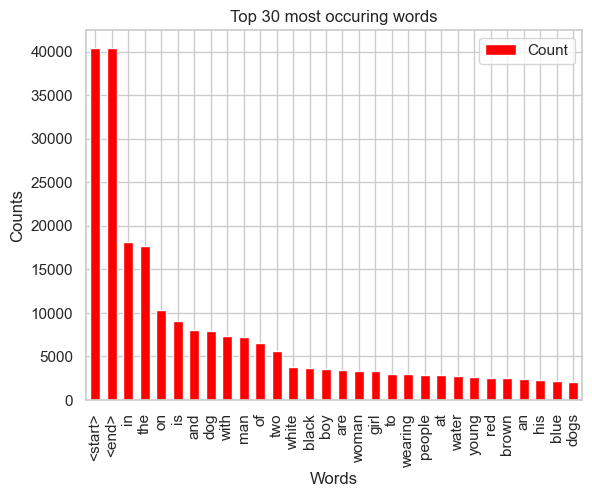

In [27]:
# Create a word count of your tokenizer to visulize the Top 30 occuring words after text processing

#your code here
tokenizer_top_words= [word for line in annotations for word in line.split()]

tokenizer_top_words_count=collections.Counter(tokenizer_top_words)
tokenizer_top_words_count

for word, count in tokenizer_top_words_count.most_common(30):
    print(word, ": ", count)

token_lst = tokenizer_top_words_count.most_common(30)
most_common_words_df = pd.DataFrame(token_lst, columns = ['Word', 'Count'])
most_common_words_df.plot.bar(x='Word',y='Count',width=0.6,color='red')
plt.title("Top 30 most occuring words")
plt.xlabel("Words")
plt.ylabel("Counts")


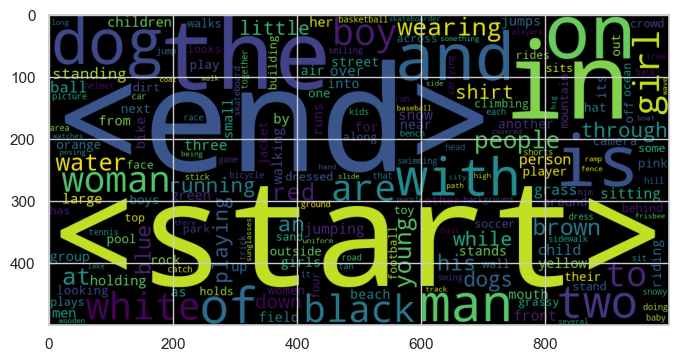

In [28]:
wordcloud_token = WordCloud(width = 1000, height = 500).generate_from_frequencies(tokenizer_top_words_count)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud_token)


In [29]:
# Pad each vector to the max_length of the captions ^ store it to a vairable

train_seqs_len=[len(seq) for seq in train_seqs] #storing all lengths in list.Can be used if needed in future
longest_word_length= max(train_seqs_len) #Python list method max returns the elements from the list with maximum value.

# Calculate the longest_word_length to pad all sequences to be the same length as the longest one.

cap_vector= tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post',maxlen=longest_word_length,
                                                          dtype='int32', value=0)

print("The shape of Caption vector is :" + str(cap_vector.shape))

The shape of Caption vector is :(40455, 31)


## Pre-processing the images

1.Resize them into the shape of (299, 299)

3.Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3. 

### FAQs on how to resize the images::
* Since you have a list which contains all the image path, you need to first convert them to a dataset using <i>tf.data.Dataset.from_tensor_slices</i>. Once you have created a dataset consisting of image paths, you need to apply a function to the dataset which will apply the necessary preprocessing to each image. 
* This function should resize them and also should do the necessary preprocessing that it is in correct format for InceptionV3.


In [30]:
#checking to know about image format as we will be setting data format as none in tf.keras.applications.inception_v3.preprocess_input

tf.keras.backend.image_data_format() 

'channels_last'

In [31]:
IMAGE_SHAPE= (299, 299)

In [32]:
#write your code here
#Let's see how preprocessed image looks by preprocessing first 5 images alone.
preprocessed_img=[]
for img in all_imgs[0:5]:
    img = tf.io.read_file(img,name=None)
    # by default channels=0 which indictaes to use the number of channels in the JPEG-encoded image.
    img = tf.image.decode_jpeg(img,channels=0) #Since its RGB images,we can give channels=3 also which will output an RGB image.
    img = tf.image.resize(img, IMAGE_SHAPE)
    img = tf.keras.applications.inception_v3.preprocess_input(img,data_format=None)#Default value for data format is None
    # It refers to global setting tf.keras.backend.image_data_format()
    preprocessed_img.append(img) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Shape after resize : (299, 299, 3)
Shape after resize : (299, 299, 3)
Shape after resize : (299, 299, 3)
Shape after resize : (299, 299, 3)
Shape after resize : (299, 299, 3)


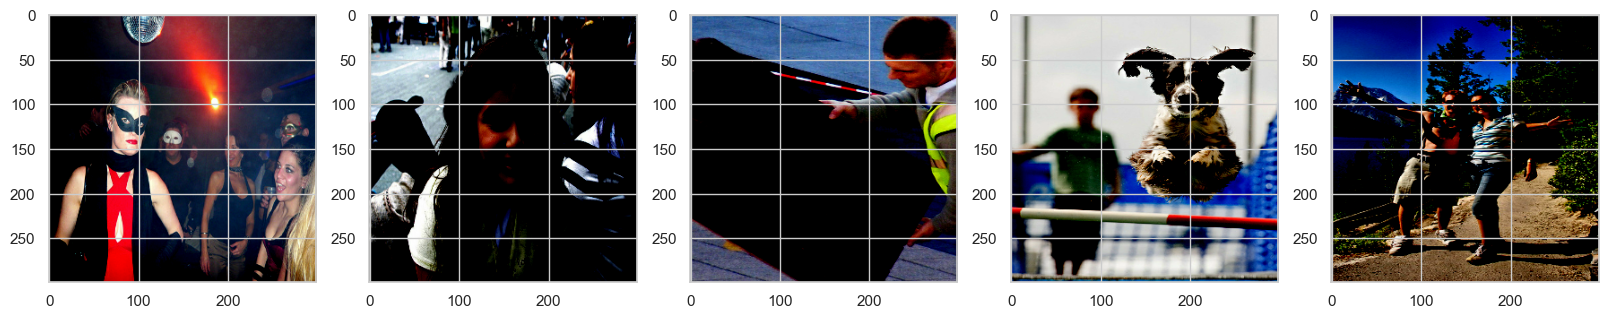

In [33]:
Display_Images= preprocessed_img[0:5]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(20)
   
for ax,image in zip(axes, Display_Images):
    print("Shape after resize :", image.shape)
    ax.imshow(image)
    ax.grid('off')

In [34]:
#write your code here

def preprocess_images_function(image_path):

    img = tf.io.read_file(image_path,name=None)
    # by default channels=0 which indictaes to use the number of channels in the JPEG-encoded image.
    #Since its RGB images,we can give channels=3 also which will output an RGB image.
    
    img = tf.image.decode_jpeg(img,channels=0) 
    img = tf.image.resize(img, IMAGE_SHAPE)
    img = tf.keras.applications.inception_v3.preprocess_input(img,data_format=None) #Default value for data format is None
    
    # It refers to global setting tf.keras.backend.image_data_format()
    
    return img, image_path

In [35]:
all_img_vector

['/Users/jyotimalik/Downloads/archive/Images/1000268201_693b08cb0e.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/1000268201_693b08cb0e.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/1000268201_693b08cb0e.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/1000268201_693b08cb0e.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/1000268201_693b08cb0e.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/1001773457_577c3a7d70.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/1001773457_577c3a7d70.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/1001773457_577c3a7d70.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/1001773457_577c3a7d70.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/1001773457_577c3a7d70.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/1002674143_1b742ab4b8.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/1002674143_1b742ab4b8.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/1002674143_1b742ab4b8.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/100267

In [36]:

# mapping each image full path including name to the function to preprocess the image

# sorting and storing unique path in list which will be given as input 
training_list = sorted(set(all_img_vector)) 

# Creating a Dataset using tf.data.Dataset.from_tensor_slice
New_Image_Data = tf.data.Dataset.from_tensor_slices(training_list)


# Mappng preprocess_images_function across the elements of the above dataset.
# num_parallel_calls= tf.data.AUTOTUNE is used, then the number of parallel calls is set dynamically based on available CPU.
New_Image_Data = New_Image_Data.map(preprocess_images_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)


# Keeping batch_size=64 (64 consecutive elements of this dataset is combined in a single batch).
# We don't want to drop the last batch if it contains element less than 64.So let's set drop_remainder=False 
New_Image_Data= New_Image_Data.batch(64,drop_remainder=False)

In [37]:
New_Image_Data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

In [38]:
#sample_img_batch, sample_cap_batch = next(iter(New_Image_Data))
#print(sample_img_batch.shape) #(batch_size, 299, 299, 3)
#print(sample_cap_batch.shape) #(batch_size, max_len)
#write your code here

# performing the train-test spliit using 80-20 ratio & random state = 42

img_train_data, img_test_data, caption_train_data, caption_test_data = train_test_split(all_img_vector,cap_vector,test_size=0.2,random_state=42)


In [39]:
print("No of images in training dataset: ",len(img_train_data))
img_train_data[0:5]

No of images in training dataset:  32364


['/Users/jyotimalik/Downloads/archive/Images/359082432_c1fd5aa2d6.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/2460799229_ce45a1d940.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/3634828052_3b6aeda7d6.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/2216568822_84c295c3b0.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/3080056515_3013830309.jpg']

In [40]:
print("No of images in testing dataset: ",len(img_test_data))
img_test_data[0:5]

No of images in testing dataset:  8091


['/Users/jyotimalik/Downloads/archive/Images/2973269132_252bfd0160.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/270263570_3160f360d3.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/2053006423_6adf69ca67.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/512101751_05a6d93e19.jpg',
 '/Users/jyotimalik/Downloads/archive/Images/3156406419_38fbd52007.jpg']

In [41]:
print("No of captions in training dataset: ",len(caption_train_data))
caption_train_data[0:5]

No of captions in training dataset:  32364


array([[   2,   11,    8,    9,   17,   39,    6,  146,  148,  110,  542,
          46,   20,    5,  170,    3,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,    5,   47,   95,  238,   17,   21,  472,  543,   17,   90,
          63,    5,   24,    3,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,   18,   10,   94,   10,  283,  195, 2640,  278,  140,    3,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,   18,   10,   26, 2236,  168,    8, 1869,  455, 1056,    6,
          62,  325,    3,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,   80,   42,    7, 3255,   20,   72,    3,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        

In [42]:
print("No of captions in testing dataset: ",len(caption_test_data))
caption_test_data[0:5]

No of captions in testing dataset:  8091


array([[   2,   54, 1626,  588,    7, 4556,  223,  121, 1476,    3,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,   13,   27,   31,  500,    6,    5, 1681,  170,    3,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,   11,    4,  164,    7,   39,    6,   82,   90,   87,   23,
           5,  458,   74,    5, 3975,    3,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,  887,   14,    9,    7,   32,    6,    5,   41,    3,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,   42,  376,  727,    3,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        

## Load the pretrained Imagenet weights of Inception net V3

1.To save the memory(RAM) from getting exhausted, extract the features of the images using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2.The shape of the output of this layer is 8x8x2048. 

3.Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)



In [43]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')

new_input = image_model.input #write code here to get the input of the image_model
hidden_layer = image_model.layers[-1].output #write code here to get the output of the image_model

#image_features_extract_model = keras.Model(new_input, hidden_layer) #build the final model using both input & output layer
image_features_extract_model = tf.compat.v1.keras.Model(new_input, hidden_layer)  #build the final model using both input & output layer

In [44]:
image_features_extract_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, None, None, 32)       96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, None, None, 32)       0         ['batch_normalization[0][0

 conv2d_11 (Conv2D)          (None, None, None, 32)       6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, None, None, 64)       192       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, None, None, 64)       192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, None, None, 96)       288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, None, None, 96)       0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, None, None, 64)       0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, None, None, 288)      0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_28 (Conv2D)          (None, None, None, 96)       55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, None, None, 96)       288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, None, None, 96)       0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, None, None, 384)      995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, None, None, 192)      147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, None, None, 192)      172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, None, None, 192)      172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, None, None, 192)      147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, None, None, 192)      576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, None, None, 768)      0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, None, None, 192)      147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, None, None, 192)      215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, None, None, 192)      215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, None, None, 160)      0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, None, None, 160)      0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, None, None, 768)      0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, None, None, 192)      576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, None, None, 192)      576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, None, None, 192)      0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, None, None, 192)      0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, None, None, 320)      552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, None, None, 192)      331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, None, None, 320)      960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, None, None, 192)      576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, None, None, 384)      0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, None, None, 384)      0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, None, None, 192)      576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, None, None, 384)      0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, None, None, 384)      0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, None, None, 384)      0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

### FAQs on how to store the features:
* You can store the features using a dictionary with the path as the key and values as the feature extracted by the inception net v3 model OR
* You can store using numpy(np.save) to store the resulting vector.

## Dataset creation
1.Apply train_test_split on both image path & captions to create the train & test list. Create the train-test spliit using 80-20 ratio & random state = 42

2.Create a function which maps the image path to their feature. 

3.Create a builder function to create train & test dataset & apply the function created earlier to transform the dataset

2.Make sure you have done Shuffle and batch while building the dataset

3.The shape of each image in the dataset after building should be (batch_size, 8*8, 2048)

4.The shape of each caption in the dataset after building should be(batch_size, max_len)


In [45]:
#write your code to extract features from each image in the dataset

image_features_dict={}
for image, image_path in tqdm(New_Image_Data): #using tqdm as progress bar
    features_for_batch = image_features_extract_model(image) #feeding images from above created dataset to Inception v3 which we build above
    #fb_shape = features_for_batch.get_shape().as_list()
    #features_for_batch_flattened = tf.contrib.layers.flatten(fb_shape) 
    features_for_batch_flattened = tf.reshape(features_for_batch,
                             (features_for_batch.shape[0], -1, features_for_batch.shape[3])) ##We are sqeezing/squashing 
                                   
    for batch_feat, path in zip(features_for_batch_flattened, image_path):
        feature_path = path.numpy().decode("utf-8")
        image_features_dict[feature_path] =  batch_feat.numpy()

100%|█████████████████████████████████████████| 127/127 [06:25<00:00,  3.04s/it]


In [46]:
features_for_batch

<tf.Tensor: shape=(27, 8, 8, 2048), dtype=float32, numpy=
array([[[[0.00000000e+00, 7.74654895e-02, 0.00000000e+00, ...,
          2.31836736e-01, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.07786268e-01, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 1.94035918e-01, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 1.85753152e-01],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          9.42662805e-02, 0.00000000e+00, 5.05789459e-01],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 4.23006684e-01, 1.34459585e-02, ...,
          2.33668655e-01, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         

In [47]:
features_for_batch_flattened

<tf.Tensor: shape=(27, 64, 2048), dtype=float32, numpy=
array([[[0.00000000e+00, 7.74654895e-02, 0.00000000e+00, ...,
         2.31836736e-01, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.07786268e-01, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.94035918e-01, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.85753152e-01],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 1.65693474e+00, 0.00000000e+00],
        [0.00000000e+00, 4.02612120e-01, 0.00000000e+00, ...,
         0.00000000e+00, 3.17920297e-01, 0.00000000e+00],
        [0.00000000e+00, 2.53475523e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.25060070e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 7.84931481e-02, ...,
         1.20641971e+00, 0.

In [48]:
len(image_features_dict)

8091

In [49]:
batch_feat.shape

TensorShape([64, 2048])

In [50]:
#printing first 5 elememts have dictionary

!pip install more-itertools

import more_itertools

top_5_items = more_itertools.take(5, image_features_dict.items())

top_5_items 


[('/Users/jyotimalik/Downloads/archive/Images/1000268201_693b08cb0e.jpg',
  array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
          0.        ],
         [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
          0.16987093],
         [0.        , 0.        , 1.0105928 , ..., 0.        , 0.        ,
          0.06111753],
         ...,
         [0.        , 0.        , 2.0380425 , ..., 1.2029668 , 0.        ,
          1.9924134 ],
         [0.        , 0.        , 0.9046867 , ..., 0.        , 0.        ,
          0.        ],
         [0.        , 1.2527261 , 0.        , ..., 0.        , 0.        ,
          0.        ]], dtype=float32)),
 ('/Users/jyotimalik/Downloads/archive/Images/1001773457_577c3a7d70.jpg',
  array([[0.        , 0.6636828 , 0.46285757, ..., 0.        , 0.        ,
          3.3322685 ],
         [0.        , 1.2268173 , 0.        , ..., 0.        , 0.25390545,
          3.3295398 ],
         [1.2881953 , 1.5195446 , 0.

In [51]:
#we need to give both images and caption to model as input
def model_input(image,captions):
    image_final = image_features_dict[image.decode('utf-8')]
    return image_final,captions

In [52]:
print("No of captions in training dataset: ",len(caption_train_data))
caption_train_data[0:5]

No of captions in training dataset:  32364


array([[   2,   11,    8,    9,   17,   39,    6,  146,  148,  110,  542,
          46,   20,    5,  170,    3,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,    5,   47,   95,  238,   17,   21,  472,  543,   17,   90,
          63,    5,   24,    3,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,   18,   10,   94,   10,  283,  195, 2640,  278,  140,    3,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,   18,   10,   26, 2236,  168,    8, 1869,  455, 1056,    6,
          62,  325,    3,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,   80,   42,    7, 3255,   20,   72,    3,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        

### FAQs on how to load the features:
* You can load the features using the dictionary created earlier OR
* You can store using numpy(np.load) to load the feature vector.

In [53]:
# create a builder function to create dataset which takes in the image path & captions as input
# This function should transform the created dataset(img_path,cap) to (features,cap) using the map_func created earlier

BUFFER_SIZE = 1000

# Batch size
BATCH_SIZE = 64 ##tried with different batch sizes.kernal is dieing for 32 .So finally fixed 64.

def data_generator(images_data, captions_data):
    
    # Creating a Dataset using tf.data.Dataset.from_tensor_slice 
    dataset = tf.data.Dataset.from_tensor_slices((images_data, captions_data))

    # num_parallel_calls= tf.data.AUTOTUNE is used, then the number of parallel calls is set dynamically based on available CPU.
    dataset = dataset.map(lambda item1, item2: tf.numpy_function(model_input, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE)
    
    # reshuffle_each_iteration=True indicate Shuffle order should be different for each epoch.
    # Keeping batch_size=64 (64 consecutive elements of this dataset is combined in a single batch).
    # We don't want to drop the last batch if it contains element less than 64.So let's set drop_remainder=False 
    # Prefetch function is used to prepare later elements while the current element is being processed.
    
    dataset = (
     dataset.shuffle(BUFFER_SIZE, reshuffle_each_iteration=True) 
    .batch(BATCH_SIZE, drop_remainder=False)
    .prefetch(tf.data.experimental.AUTOTUNE)
    ) 

    return dataset



In [54]:
train_dataset=data_generator(img_train_data,caption_train_data) 
test_dataset=data_generator(img_test_data,caption_test_data) 

In [55]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))

print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,40)

(64, 64, 2048)
(64, 31)


## Model Building
1.Set the parameters

2.Build the Encoder, Attention model & Decoder

In [56]:
embedding_dim = 256 
units = 512
vocab_size = 5001 #top 5,000 words +1
train_num_steps = len(img_train_data) // BATCH_SIZE  #len(total train images) // BATCH_SIZE
test_num_steps = len(img_test_data) // BATCH_SIZE   #len(total test images) // BATCH_SIZE
max_length=31
features_shape = batch_feat.shape[1]
attention_features_shape = batch_feat.shape[0]

### Encoder

In [57]:
tf.compat.v1.reset_default_graph() #to resolve compatibility issue
#from tensorflow.python.framework import ops
#ops.reset_default_graph()
#tf.compat.v1.GraphDef()

In [58]:
print(tf.compat.v1.get_default_graph())

PyGraph<6125219424>


In [59]:
class Encoder(Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embed_dim) #build your Dense layer with relu activation
        #It acts as the fully connected layer
        
    def call(self, features):
        features = self.dense(features) # extract the features from the image shape: (batch, 8*8, embed_dim)
        features = tf.keras.activations.relu(features, alpha=0.01, max_value=None, threshold=0) #applying relu activation 
        return features

In [60]:
encoder=Encoder(embedding_dim)

### Attention model

In [61]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 =  tf.keras.layers.Dense(units)#build your Dense layer
        self.W2 = tf.keras.layers.Dense(units) #build your Dense layer
        self.V = tf.keras.layers.Dense(1)#build your final Dense layer with unit 1
        self.units=units

    def call(self, features, hidden):
        #features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)
        hidden_with_time_axis=hidden[:, tf.newaxis] # Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        score =tf.keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis))# build your score funciton to shape: (batch_size, 8*8, units)
        attention_weights =  tf.keras.activations.softmax(self.V(score), axis=1)# extract your attention weights with shape: (batch_size, 8*8, 1)
        context_vector =  attention_weights * features #shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector = tf.reduce_sum(context_vector, axis=1)# reduce the shape to (batch_size, embedding_dim)
        # the tensor is reduced along the second dimension (columns)

        return context_vector, attention_weights

### Decoder

In [62]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units)#iniitalise your Attention model with units
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim)#build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units) #build your Dense layer
        self.d2 = tf.keras.layers.Dense(vocab_size)   #build your Dense layer

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden)#create your context vector & attention weights from attention model
        embed = self.embed(x)# embed your input to shape: (batch_size, 1, embedding_dim)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis=-1)# Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = self.gru(embed) # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)

        return output,state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [63]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [64]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)oder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (64, 64, 256)
Predcitions shape from Decoder: (64, 5001)
Attention weights shape from Decoder: (64, 64, 1)


## Model training & optimization
1.Set the optimizer & loss object

2.Create your checkpoint path

3.Create your training & testing step functions

4.Create your loss function for the test dataset

In [84]:
optimizer =tf.keras.optimizers.legacy.Adam (learning_rate=0.001) #define the optimizer

loss_object =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True,
                                                            reduction=tf.keras.losses.Reduction.NONE) #define your loss object


In [85]:
#zero is causing discrepency.we dont want decoder to give importance to zero.so lets mask zero to false

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask # we are multiplying loss with mask to get ideal shape

    return tf.reduce_mean(loss_)

In [86]:
#path='https://upgrad.nimblebox.ai/project/upg-aruna-4881-21712/tree?/checkpoint'
#os.mkdir(path)

checkpoint_path = "/Users/jyotimalik/Downloads/archive/Images/checkpoint1"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [87]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

* While creating the training step for your model, you will apply Teacher forcing.
* Teacher forcing is a technique where the target/real word is passed as the next input to the decoder instead of previous prediciton.

In [88]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    #hidden = decoder.reset_state(batch_size=target.shape[0]) #we dont have reset_state method
    hidden = decoder.init_state(batch_size=target.shape[0])

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape: #Record operations for automatic differentiation.
        #write your code here to do the training steps
        encoder_output = encoder(img_tensor)

        # Using the teacher forcing technique where the target word is passed as the next input to the decoder.
        for t in range(1, target.shape[1]):
          # passing encoder_output to the decoder
          predictions, hidden, _ = decoder(dec_input, encoder_output, hidden)

          loss += loss_function(target[:, t], predictions) 

          # using teacher forcing
          dec_input = tf.expand_dims(target[:, t], 1)
    
    avg_loss = (loss / int(target.shape[1]))#we are calculating average loss for every batch

    tot_trainables_variables = encoder.trainable_variables + decoder.trainable_variables

    grads = tape.gradient(loss, tot_trainables_variables) # to calculate gradients with respect to every trainable variable

    #compute gradients and apply it to the optimizer and backpropagate.
    optimizer.apply_gradients(zip(grads, tot_trainables_variables))
        
    return loss, avg_loss

In [89]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    #hidden = decoder.reset_state(batch_size=target.shape[0]) #we dont have reset_state method
    hidden = decoder.init_state(batch_size=target.shape[0])

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape: #Record operations for automatic differentiation for implementing backpropagation
        #write your code here to do the training steps
        encoder_output = encoder(img_tensor)

        # Using the teacher forcing technique where the target word is passed as the next input to the decoder
        for t in range(1, target.shape[1]):
          # passing encoder_output to the decoder
          predictions, hidden, _ = decoder(dec_input, encoder_output, hidden)

          loss += loss_function(target[:, t], predictions)

          dec_input = tf.expand_dims(target[:, t], 1)
    
    avg_loss = (loss / int(target.shape[1])) #we are calculating average loss for every batch

    tot_trainables_variables = encoder.trainable_variables + decoder.trainable_variables
    
    grads = tape.gradient(loss, tot_trainables_variables) # to calculate gradients with respect to every trainable variable

    #compute gradients and apply it to the optimizer and backpropagate.
    optimizer.apply_gradients(zip(grads, tot_trainables_variables)) 
        
    return loss, avg_loss

* While creating the test step for your model, you will pass your previous prediciton as the next input to the decoder.

In [90]:
def test_loss_cal(test_dataset):
    total_loss = 0

    #write your code to get the average loss result on your test data

    for (batch, (img_tensor, target)) in enumerate(test_dataset):
        batch_loss, t_loss = test_step(img_tensor, target)
        total_loss += t_loss
        avg_test_loss=total_loss / test_num_steps
    
    return avg_test_loss

In [91]:
loss_plot = []
test_loss_plot = []
EPOCHS = 15
print('this is running')
best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps
        
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

this is running


  7%|██▋                                      | 1/15 [09:00<2:06:03, 540.28s/it]

For epoch: 1, the train loss is 1.115, & test loss is 1.100
Time taken for 1 epoch 540.1054630279541 sec

Test loss has been reduced from 100.000 to 1.100
For epoch: 2, the train loss is 1.003, & test loss is 0.996
Time taken for 1 epoch 513.7408449649811 sec

Test loss has been reduced from 1.100 to 0.996


 20%|████████▏                                | 3/15 [42:05<3:11:25, 957.15s/it]

For epoch: 3, the train loss is 0.929, & test loss is 0.920
Time taken for 1 epoch 1471.434114933014 sec

Test loss has been reduced from 0.996 to 0.920
For epoch: 4, the train loss is 0.867, & test loss is 0.859
Time taken for 1 epoch 836.3906450271606 sec

Test loss has been reduced from 0.920 to 0.859


 27%|██████████▉                              | 4/15 [56:02<2:46:46, 909.64s/it]

For epoch: 5, the train loss is 0.814, & test loss is 0.805
Time taken for 1 epoch 796.4421110153198 sec

Test loss has been reduced from 0.859 to 0.805


 33%|█████████████                          | 5/15 [1:09:19<2:24:49, 868.96s/it]

For epoch: 6, the train loss is 0.764, & test loss is 0.754
Time taken for 1 epoch 781.9780728816986 sec

Test loss has been reduced from 0.805 to 0.754


 40%|███████████████▌                       | 6/15 [1:22:21<2:05:55, 839.47s/it]

For epoch: 7, the train loss is 0.719, & test loss is 0.708
Time taken for 1 epoch 480.0557038784027 sec

Test loss has been reduced from 0.754 to 0.708


 47%|██████████████████▏                    | 7/15 [1:30:22<1:36:16, 722.09s/it]

For epoch: 8, the train loss is 0.678, & test loss is 0.667
Time taken for 1 epoch 536.490541934967 sec

Test loss has been reduced from 0.708 to 0.667


 53%|████████████████████▊                  | 8/15 [1:39:19<1:17:21, 663.12s/it]

For epoch: 9, the train loss is 0.641, & test loss is 0.630
Time taken for 1 epoch 588.2780022621155 sec

Test loss has been reduced from 0.667 to 0.630


 60%|███████████████████████▍               | 9/15 [1:49:07<1:03:59, 639.86s/it]

For epoch: 10, the train loss is 0.605, & test loss is 0.594
Time taken for 1 epoch 694.4619948863983 sec

Test loss has been reduced from 0.630 to 0.594


 67%|██████████████████████████▋             | 10/15 [2:00:42<54:44, 656.85s/it]

For epoch: 11, the train loss is 0.572, & test loss is 0.561
Time taken for 1 epoch 614.4911727905273 sec

Test loss has been reduced from 0.594 to 0.561


 80%|████████████████████████████████        | 12/15 [2:24:28<34:44, 694.80s/it]

For epoch: 12, the train loss is 0.542, & test loss is 0.530
Time taken for 1 epoch 810.8031606674194 sec

Test loss has been reduced from 0.561 to 0.530
For epoch: 13, the train loss is 0.517, & test loss is 0.503
Time taken for 1 epoch 512.7825968265533 sec

Test loss has been reduced from 0.530 to 0.503


 87%|██████████████████████████████████▋     | 13/15 [2:33:01<21:19, 639.77s/it]

For epoch: 14, the train loss is 0.492, & test loss is 0.478
Time taken for 1 epoch 589.2303590774536 sec

Test loss has been reduced from 0.503 to 0.478


100%|████████████████████████████████████████| 15/15 [2:54:00<00:00, 696.06s/it]

For epoch: 15, the train loss is 0.467, & test loss is 0.453
Time taken for 1 epoch 669.4809150695801 sec

Test loss has been reduced from 0.478 to 0.453


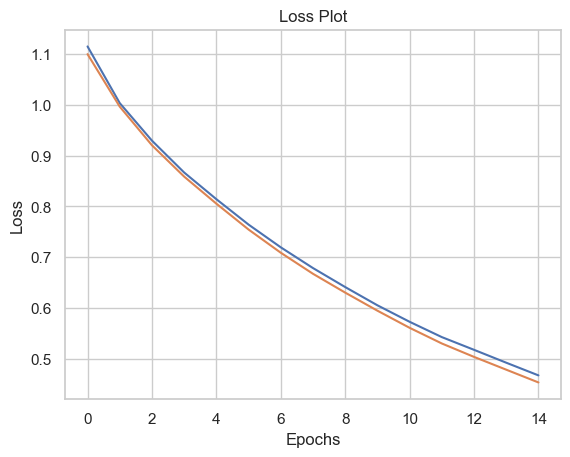

In [92]:
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.grid('off')
plt.show()

#### NOTE: 
* Since there is a difference between the train & test steps ( Presence of teacher forcing), you may observe that the train loss is decreasing while your test loss is not. 
* This doesn't mean that the model is overfitting, as we can't compare the train & test results here, as both approach is different.
* Also, if you want to achieve better results you can run it more epochs, but the intent of this capstone is to give you an idea on how to integrate attention mechanism with E-D architecture for images. The intent is not to create the state of art model. 

## Model Evaluation
1.Define your evaluation function using greedy search

2.Define your evaluation function using beam search ( optional)

3.Test it on a sample data using BLEU score

### Greedy Search

In [93]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    #hidden = decoder.reset_state(batch_size=1)
    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(preprocess_images_function(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = image_features_extract_model(temp_input) # Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)# extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)# get the output from decoder

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id =  tf.argmax(predictions[0]).numpy()#extract the predicted id(embedded value) which carries the max value
        result.append(tokenizer.index_word[predicted_id])#map the id to the word from tokenizer and append the value to the result list

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions

In [94]:
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))
    
    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))
        
        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)
        
        img=ax.imshow(temp_img)
        
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [95]:
from nltk.translate.bleu_score import sentence_bleu

In [96]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [97]:
img_test=img_test_data.copy()

In [99]:
#modifying the given code as function to run it several times by changing weights
def predicted_caption_audio(random,autoplay=False,weights=(0.5, 0.5, 0, 0)):

    cap_test=caption_test_data.copy()
    rid = np.random.randint(0, random)
    test_image = img_test[rid]
    #test_image = '/Users/jyotimalik/Downloads/archive/Images/413231421_43833a11f5.jpg'
    #real_caption = '<start> black dog is digging in the snow <end>'

    real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test[rid] if i not in [0]])
    result, attention_plot,pred_test = evaluate(test_image)

    real_caption=filt_text(real_caption)      

    pred_caption=' '.join(result).rsplit(' ', 1)[0]

    real_appn = []
    real_appn.append(real_caption.split())
    reference = real_appn
    candidate = pred_caption.split()

    score = sentence_bleu(reference, candidate, weights=weights)#set your weights)
    print(f"BELU score: {score*100}")

    print ('Real Caption:', real_caption)
    print ('Prediction Caption:', pred_caption)
    plot_attmap(result, attention_plot, test_image)

    #Let's use Google Text to Speech Online API from playing the predicted caption as audio
    speech = gTTS("Predicted Caption is: "+ pred_caption,lang = 'en', slow = False) 
    speech.save('voice.mp3')
    audio_file = 'voice.mp3'
    #playsound('voice.wav')
    display.display(display.Audio(audio_file, rate=None,autoplay=autoplay))
    
    return test_image

/Users/jyotimalik/anaconda3/lib/python3.10/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/jyotimalik/anaconda3/lib/python3.10/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


BELU score: 29.367317920847036
Real Caption: two brown dogs fight on the leafy ground
Prediction Caption: two brown and white dogs are in clearing of wooded area


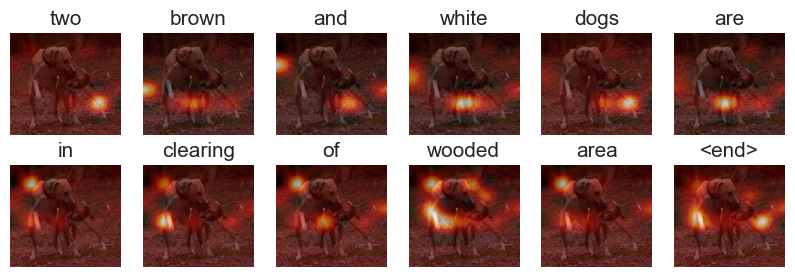

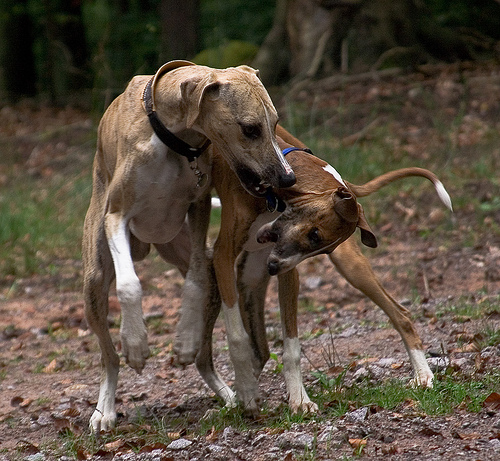

In [100]:
test_image=predicted_caption_audio(5,True,weights=(0.5,0.25,0,0))

Image.open(test_image)

BELU score: 0
Real Caption: two dogs are looking up at person
Prediction Caption: black dog sits on the floor


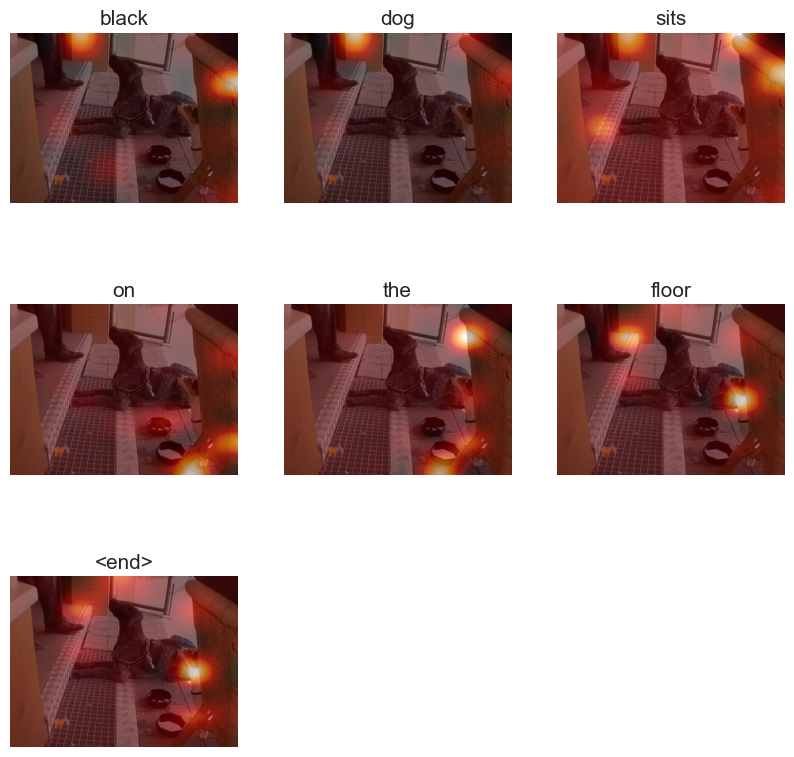

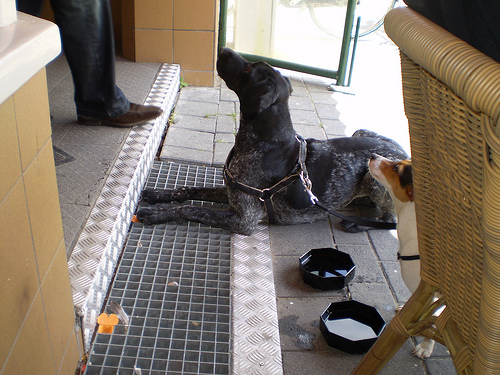

In [101]:
test_image=predicted_caption_audio(len(img_test),False,weights=(0.5,0.25,0,0))

Image.open(test_image)

BELU score: 45.680791498291754
Real Caption: man jumps with his bike near brick wall
Prediction Caption: man jumps with his bicycle


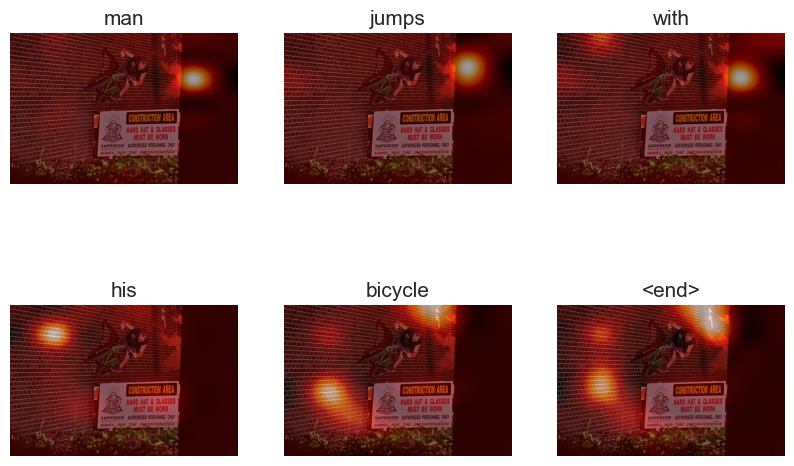

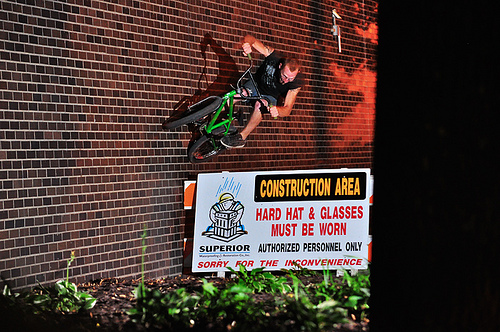

In [103]:
test_image=predicted_caption_audio(len(img_test),False,weights=(0.5,0.25,0,0))

Image.open(test_image)


BELU score: 69.00655593423542
Real Caption: the boy jumps into the blue pool
Prediction Caption: young boy jumps into the blue blanket


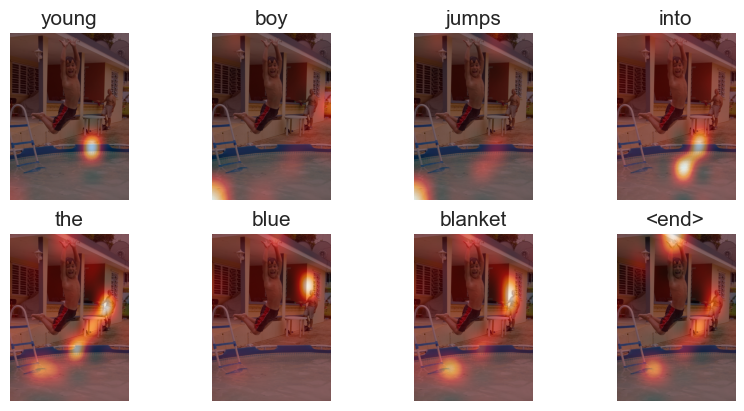

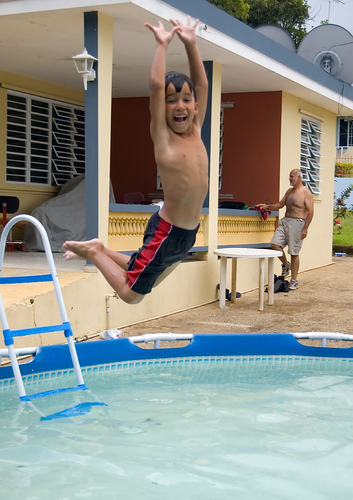

In [104]:
test_image=predicted_caption_audio(len(img_test),False,weights=(0.5,0.5,0,0))

Image.open(test_image)

/Users/jyotimalik/anaconda3/lib/python3.10/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/jyotimalik/anaconda3/lib/python3.10/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


BELU score: 17.410441154600917
Real Caption: baseball pitcher with UNK on his shirt throws the ball
Prediction Caption: baseball player is running after the ball


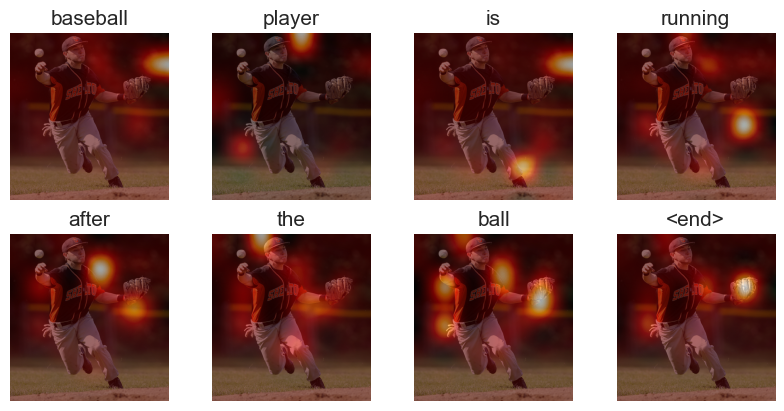

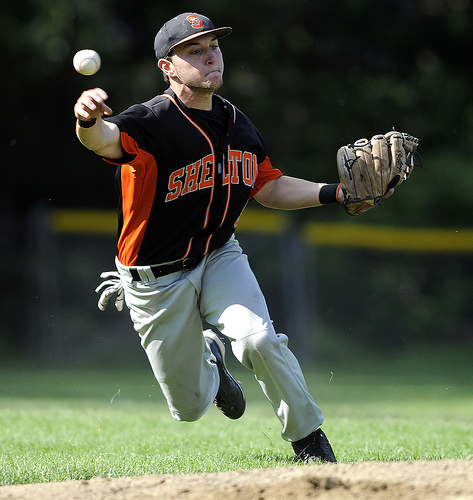

In [105]:
test_image=predicted_caption_audio(len(img_test),False,weights=(0.5,0.5,0,0))

Image.open(test_image)